## True Shooting Percentage Analysis

### Overview
This notebook calculates and analyzes the True Shooting Percentage (TS%) for Partizan Mozzart Bet Belgrade players in the 2022-2023 EuroLeague season. TS% is a metric that measures scoring efficiency by accounting for points from field goals and free throws. The analysis includes:
- Computing TS% for individual players.
- Identifying the top players by TS%.
- Validating the TS% calculation for a specific player.
- Visualizing the results with a bar plot.
- Comparing TS% between the regular season and playoffs to assess performance under pressure.

In [10]:
import pandas as pd

file_path = "../data/partizan_2022_cleaned.csv"

df = pd.read_csv(file_path)

Separate the dataset into individual player statistics and team totals to focus on player-specific metrics like TS%.

In [11]:
# filter 
players = df[df['player'] != 'PARTIZAN MOZZART BET BELGRADE'].copy()
team = df[df['player'] == 'PARTIZAN MOZZART BET BELGRADE'].copy()

### True Shooting Percentage (TS%)  
Calculate the True Shooting Percentage (TS%) for each player - a handy metric that shows how efficiently they score by factoring in points from both field goals and free throws.

### Formula  
TS% = Points / (2 * (FGA + 0.44 * FTA)), where FGA = 2PA + 3PA

In [12]:
# calculate True Shooting Percentage (TS%)
# formula: TS% = Points / (2 * (FGA + 0.44 * FTA)), where FGA = 2PA + 3PA
players['field_goals_attempted'] = players['two_points_attempted'] + players['three_points_attempted']
players['ts_percentage'] = players['points'] / (2 * (players['field_goals_attempted'] + 0.44 * players['free_throws_attempted']))

# handle division by zero (players with no shot attempts)
players['ts_percentage'] = players['ts_percentage'].fillna(0).replace([float('inf'), -float('inf')], 0)

# average TS% per player
avg_ts = players.groupby('player')['ts_percentage'].mean().sort_values(ascending=False).head(14)


print("Top 5 Players by True Shooting Percentage (TS%):")
print(avg_ts.head())

Top 5 Players by True Shooting Percentage (TS%):
player
Lessort Mathias    0.721486
Exum Dante         0.671916
Punter Kevin       0.623184
Smailagic Alen     0.619905
Leday Zach         0.587875
Name: ts_percentage, dtype: float64


The top 5 players by TS% are displayed, with Mathias Lessort leading at 0.7215 (72.15%). This indicates his high efficiency in scoring relative to his shot attempts.

Verify the TS% calculation for Mathias Lessort by comparing the computed TS% with a manual calculation using averaged statistics.

In [13]:
# check: Validate a specific player's TS% with raw averages
player_to_check = 'Lessort Mathias'  
check_player = players[players['player'] == player_to_check]
raw_means = check_player[['points', 'field_goals_attempted', 'free_throws_attempted']].mean()
computed_ts = check_player['ts_percentage'].mean()

# manual calculation from averages
denominator = 2 * (raw_means['field_goals_attempted'] + 0.44 * raw_means['free_throws_attempted'])
manual_ts = raw_means['points'] / denominator if denominator > 0 else 0

print(f"\nCheck for {player_to_check}:")
print(f"Computed TS% from mean of per-game TS%: {computed_ts:.4f}")
print(f"Manual TS% from averaged stats: {manual_ts:.4f}")
print(f"Raw Averages - Points: {raw_means['points']:.2f}, FGA: {raw_means['field_goals_attempted']:.2f}, FTA: {raw_means['free_throws_attempted']:.2f}")


Check for Lessort Mathias:
Computed TS% from mean of per-game TS%: 0.7215
Manual TS% from averaged stats: 0.7128
Raw Averages - Points: 12.00, FGA: 6.37, FTA: 4.66


The computed TS% (0.7215) and manual TS% (0.7128) are very close, with a slight difference due to averaging methods. This confirms the accuracy of the TS% calculation.

Create a bar plot to visually compare the TS% of players, highlighting the top 5 with a distinct color for emphasis.

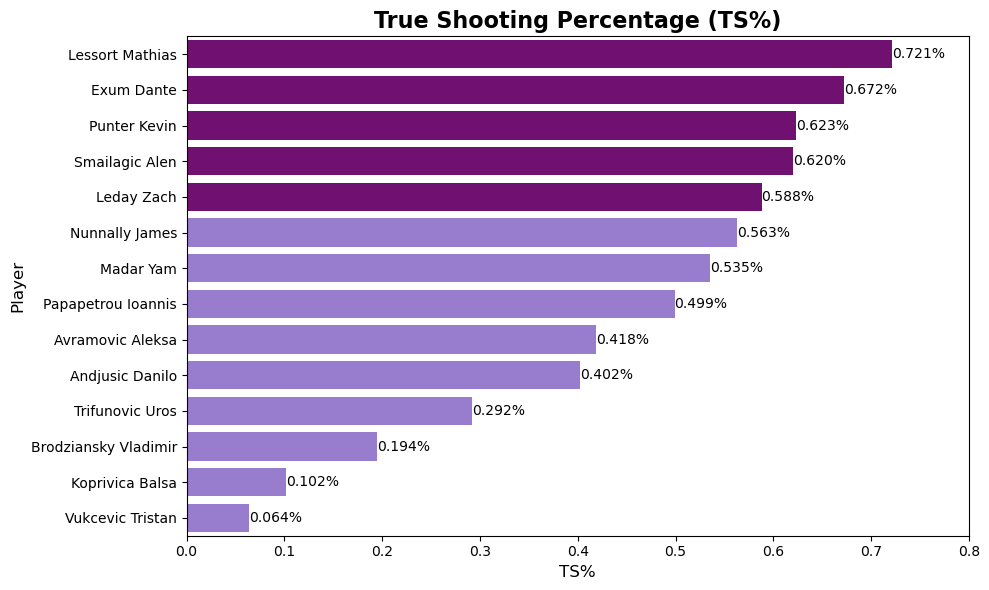

In [14]:
# vizualization
import matplotlib.pyplot as plt
import seaborn as sns 

# define different colors to separate top 5 players
n_players = len(avg_ts)
top_5_players = '#800080'
other_players = '#9370DB'

# create a color separation
colors = [top_5_players if i < 5 else other_players for i in range(n_players)]

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=avg_ts.values, y=avg_ts.index, hue=avg_ts.index, palette=colors, width=0.8)
plt.title('True Shooting Percentage (TS%)', fontsize=16, fontweight='bold')
plt.xlabel('TS%', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.xlim(0, 0.8)

# add TS% values to the bars
for i, v in enumerate(avg_ts.values):
    ax.text(v , i, f'{v:.3f}%', va='center', ha='left', fontsize=10)

plt.tight_layout()
plt.show()

A horizontal bar plot is generated, showing the players by TS%. The top 5 players are highlighted in dark purple, with TS% values (e.g., 0.721% for Lessort Mathias) annotated on each bar. This visualization enables quick comparison of player efficiency.

Analyze how players’ TS% differs between the regular season and playoffs to identify those who excel under playoff pressure.

In [15]:
# compare TS% between regular season and playoffs
# split into regular season and playoffs
regular_players = players[players['phase'] == 'REGULAR SEASON'].copy()
playoff_players = players[players['phase'] == 'PLAYOFFS'].copy()

# function to calculate TS%
def calculate_ts_percentage(df):
    df['field_goals_attempted'] = df['two_points_attempted'] + df['three_points_attempted']
    df['ts_percentage'] = df['points'] / (2 * (df['field_goals_attempted'] + 0.44 * df['free_throws_attempted']))
    df['ts_percentage'] = df['ts_percentage'].fillna(0).replace([float('inf'), -float('inf')], 0)
    return df

# apply to both phases
regular_players = calculate_ts_percentage(regular_players)
playoff_players = calculate_ts_percentage(playoff_players)

# average TS% per player
regular_avg_ts = regular_players.groupby('player')['ts_percentage'].mean()
playoff_avg_ts = playoff_players.groupby('player')['ts_percentage'].mean()

# combine and calculate difference
combined_ts = pd.DataFrame({
    'ts_regular': regular_avg_ts,
    'ts_playoff': playoff_avg_ts
}).fillna(0)
combined_ts['ts_diff'] = combined_ts['ts_playoff'] - combined_ts['ts_regular']


top_5_ts_diff = combined_ts.sort_values('ts_diff', ascending=False).head(5)
print("\nTop 5 Players by TS% Difference (Playoffs - Regular Season):")
print(top_5_ts_diff)


Top 5 Players by TS% Difference (Playoffs - Regular Season):
                  ts_regular  ts_playoff   ts_diff
player                                            
Punter Kevin        0.607981    0.795480  0.187498
Trifunovic Uros     0.276483    0.392440  0.115957
Smailagic Alen      0.607247    0.683199  0.075952
Madar Yam           0.527347    0.588687  0.061340
Vukcevic Tristan    0.057666    0.100000  0.042334


The top 5 players with the greatest TS% increase in the playoffs are shown. Kevin Punter leads with a 0.1875 improvement, indicating significantly higher efficiency in the playoffs.

Verify the TS% calculation for Kevin Punter in both the regular season and playoffs, ensuring consistency between computed and manual methods.

In [16]:
# check a specific player's TS% in both phases
player_to_check = 'Punter Kevin'
for phase_name, phase_df in [('Regular Season', regular_players), ('Playoffs', playoff_players)]:
    check_player = phase_df[phase_df['player'] == player_to_check]
    if check_player.empty:
        print(f"\n{player_to_check} has no games in {phase_name}")
        continue
    raw_means = check_player[['points', 'field_goals_attempted', 'free_throws_attempted']].mean()
    computed_ts = check_player['ts_percentage'].mean()
    denominator = 2 * (raw_means['field_goals_attempted'] + 0.44 * raw_means['free_throws_attempted'])
    manual_ts = raw_means['points'] / denominator if denominator > 0 else 0
    
    
    
    print(f"\nCheck for {player_to_check} - {phase_name}:")
    print(f"Computed TS% from mean of per-game TS%: {computed_ts:.4f}")
    print(f"Manual TS% from averaged stats: {manual_ts:.4f}")
    print(f"Raw Averages - Points: {raw_means['points']:.2f}, FGA: {raw_means['field_goals_attempted']:.2f}, FTA: {raw_means['free_throws_attempted']:.2f}")


Check for Punter Kevin - Regular Season:
Computed TS% from mean of per-game TS%: 0.6080
Manual TS% from averaged stats: 0.6166
Raw Averages - Points: 15.50, FGA: 10.91, FTA: 3.76

Check for Punter Kevin - Playoffs:
Computed TS% from mean of per-game TS%: 0.7955
Manual TS% from averaged stats: 0.7900
Raw Averages - Points: 22.67, FGA: 12.00, FTA: 5.33


The computed and manual TS% values are close for both phases, with minor differences due to averaging methods. This validates the accuracy of the TS% calculations for Kevin Punter.

### Conclusion  
This notebook successfully:  

- Calculated TS% for Partizan players, identifying **Mathias Lessort** as the most efficient scorer (TS% = 0.7215).  
- Validated the TS% calculation for Lessort, confirming its accuracy.  
- Visualized players by TS%, highlighting the top 5 for easy comparison.  
- Compared TS% between regular season and playoffs, revealing **Kevin Punter**’s significant improvement (0.1875 increase) in the playoffs.  
- Validated Punter’s phase-specific TS%, ensuring calculation consistency.  

The analysis provides actionable insights into player efficiency, useful for coaching decisions or further statistical modeling.